# Part 1: Régression Linéaire simple
 

La régression linéaire simple est un algorithme prédictif supervisé. Il prend en entrée une variable prédictive x et va essayer de trouver une fonction de prédiction  $h_\theta(x)$ étant une droite, elle s’écrira mathématiquement sous la forme :
$$ h_\theta(x)=\theta_0+\theta_1 x$$
 Avec $ \theta_0$ et $ \theta_1$ sont les coefficients de la droite.

Le but  revient à trouver un couple $(\theta_0,\theta_1)$ optimal tel que $h_\theta(x)$ soit le plus proche possible de $y$ (la valeur qu’on essaie de prédire). Et ce, pour tous les couples $(x,y)$ qui forment notre ensemble de données d’apprentissage $ \{ (x_{i},y_{i}) \in R^{2}, i=1...n \}$.
 La fonction $h_\theta$ va essayer de transformer au mieux  $x_i$ en $y_i$ tel que  $$ h_\theta(x_i)\approx y_i  \forall i \in \{1 ... n\}$$
 <img src="courbe.jpeg" style="with:100px;height:200px"/>

## 1- Load Data Set

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
data = pd.read_csv('ex1data1.txt', header=None)

In [134]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Important: vérifier les dimensions de x et y. On remarque que y n'a pas les dimensions (100, 1). On corrige le probleme avec np.reshape

In [135]:
x = data.iloc[:, 0]
y = np.asarray(data.iloc[:, 1]).reshape(-1, 1)
print(f"x.shape: {x.shape}")
print(f"y.shape: {y.shape}")


x.shape: (97,)
y.shape: (97, 1)


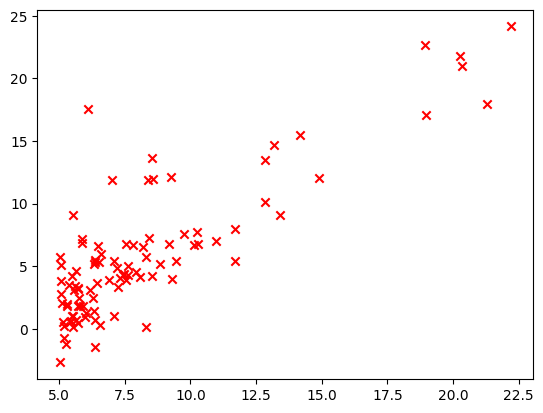

In [136]:
plt.scatter(x, y, marker='x', color='r')

2-Créez la matrice X. 




In [137]:
X = np.asarray(x).reshape(-1, 1)
X = np.hstack((X, np.ones(X.shape)))
print(X.shape)

(97, 2)


In [138]:
print(X[:5])

[[6.1101 1.    ]
 [5.5277 1.    ]
 [8.5186 1.    ]
 [7.0032 1.    ]
 [5.8598 1.    ]]


3-Créez le vecteur $\theta$ (initialisé avec des coefficients aléatoires).

In [139]:
theta = np.random.randn(2, 1)
theta

array([[-1.88511258],
       [ 1.81744206]])

## 2- Modele Linéaire de prédiction 


Implémenter le modèle de prédiction $ H_\theta=X.\theta$

In [140]:
def lineaire_prediction(X, theta):
    return X.dot(theta)

In [141]:
lineaire_prediction(X, theta)

array([[ -9.7007843 ],
       [ -8.60289474],
       [-14.24107794],
       [-11.38437834],
       [ -9.22894062],
       [-13.98526817],
       [-12.27641362],
       [-14.35324214],
       [-10.40977514],
       [ -7.71104798],
       [ -8.94787034],
       [-24.88329249],
       [ -8.99179346],
       [-14.03333854],
       [ -8.81591246],
       [ -8.32333254],
       [-10.18205354],
       [ -7.85337397],
       [-10.30307777],
       [-11.51181195],
       [ -9.84970819],
       [-36.39378989],
       [ -8.5320145 ],
       [-10.10796862],
       [ -8.67302092],
       [-33.89601572],
       [-22.36478209],
       [-18.83773645],
       [-23.02080126],
       [-40.0377125 ],
       [ -8.08392324],
       [-10.60431876],
       [-15.61645608],
       [ -9.28926423],
       [-13.66140583],
       [-13.13791006],
       [-13.44424086],
       [ -8.75106458],
       [-22.37986299],
       [-10.15943219],
       [ -8.37517314],
       [-11.15684526],
       [-20.253456  ],
       [ -9

## 3- Fonction Cout 


Ecrire un script qui définit la fonction cout $$ J(\theta)=\frac{1}{2m}\sum(X.\theta-Y)^{2}$$

In [142]:
def cost_function(x,o,y):
    return np.mean((x.dot(o)-y)**2)*(1/(2*len(x)))


In [143]:
cost_function(X, theta, y)

2.7108104617994444

## 4- Gradients et Descente de Gradient 
 


1-Ecrire un script qui définit la fonction du gradiant $$ \frac{\delta J(\theta)}{\delta \theta}=\frac{1}{m}X^T.(X.\theta-y)$$

In [144]:
grade_function=lambda x,o,y: np.dot(np.transpose(x),lineaire_prediction(x,o)-y)*(1 / len(x))

grade_function(X,theta,y)

array([[-203.95448251],
       [ -19.4038346 ]])

2-Implementer la descente de gradient en utilisant de gradiant:
$$ \theta\leftarrow \theta- \alpha\frac{\delta J(\theta)}{\delta \theta}$$

In [145]:
def descendent(o,alpha,x,y):
    return o-(grade_function(x,o,y)*alpha)

## 5-Calcul des parametres $\theta_1$ et  $\theta_0$
 
 


  1-On définit un nombre d'itérations de $200$ , ainsi $\alpha=0.01$,calculer $\theta_1$ et  $\theta_0$

In [146]:
iteration=200
new_deta_value=theta
for i in range(iteration):
    new_deta_value=descendent(new_deta_value,0.01,X,y)
        
def iter(iteratio):
    cost_value=[]
    new_deta_value=theta
    new_deta_cost=theta
    for i in range(iteratio):
        new_deta_cost=descendent(new_deta_cost,0.01,X,y)
        cost_value.append(cost_function(X,new_deta_cost,y))
    return cost_value
#     return lineaire_prediction(X,new_deta_value)
new_deta_value

array([[0.77549506],
       [0.26045108]])

2-Créer d'un vecteur prédictions qui contient les prédictions de notre modele final

In [147]:
new_y_predect = lineaire_prediction(X,new_deta_value)

3-Afficher les résultats de prédictions par rapport a notre Dataset

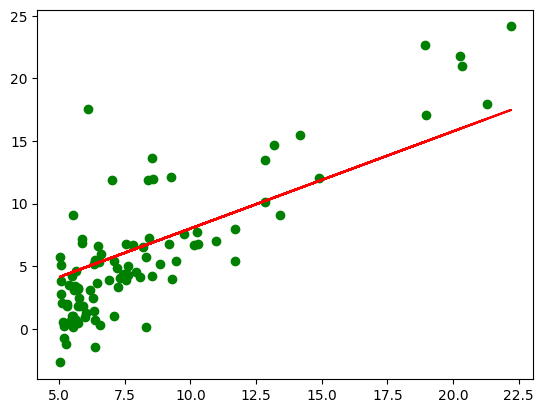

In [148]:
plt.scatter(X[:,0] , y , c='green')
plt.plot(X[:,0] , new_y_predect , c='red')

 ## 5. Courbes d'apprentissage

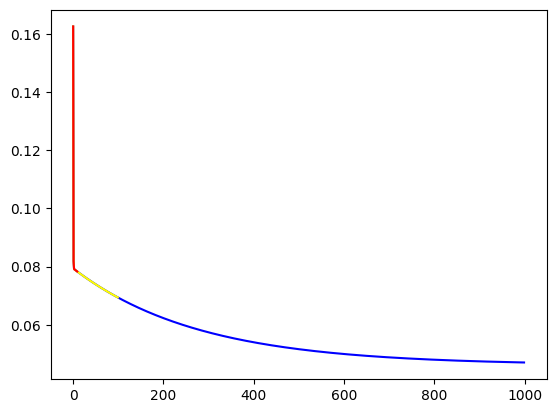

In [149]:
nbr_iter=100
plt.plot(range(1000),iter(1000),c="blue")
plt.plot(range(100),iter(100),c="yellow")
plt.plot(range(10),iter(10),c="red")

# Part 2: Régression Linéaire Multiple



La régression linéaire multiple est une extension de la régression linéaire simple. Elle prend en entrée plusieurs variables prédictives $x_1,x_2,...,x_n$ et va essayer de trouver une fonction de prédiction  $h_\theta(x)$ étant une droite, elle s’écrira mathématiquement sous la forme :

## 1-datasets

In [160]:
# load data
data = pd.read_csv('ex1data2.txt', header=None)

In [161]:
# show data
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 2-redimentioner les matrices, créer la matrice X et $\theta$

In [221]:
# get x and y
x = data.iloc[:, 0:2]
# convet x to numpy array
x = np.asarray(x)
x = np.array([[x[i][0] , 1] for i in range(len(x))])
y = np.asarray(data.iloc[:, 2]).reshape(-1, 1)
print(f"x.shape: {x.shape}")
print(f"y.shape: {y.shape}")

x.shape: (47, 2)
y.shape: (47, 1)


In [222]:
import random
deta=np.reshape( np.array([random.randint(9,10) for i in range]) ,(2,1))
deta

array([[9],
       [9]])

### 3-Implémenter le model de prédiction, Fonction cout, Gradients et Descente de Gradient

In [223]:
def cost_function(x,o,y):
    return (sum([o[1]*x[i][1]+o[0]*x[i][0] for i in range(len(x))]-y)**2)*(1/(2*len(x)))

def lineaire_prediction(x,deta):
    return x.dot(deta)

def descendent(o,alpha,x,y):
    return o-(grade_function(x,o,y)*alpha)

grade_function=lambda x,o,y: np.dot(np.transpose(x),lineaire_prediction(x,o)-y)*(1 / len(x))

[[7.22603666e+07]
 [3.22487532e+04]]
[[-3.33902056e+13]
 [-1.44569301e+10]]
[[1.54290440e+19]
 [6.68030149e+15]]
[[-7.12949786e+24]
 [-3.08685328e+21]]
[[3.29441925e+30]
 [1.42638221e+27]]
[[-1.52229490e+36]
 [-6.59106868e+32]]
[[7.03426486e+41]
 [3.04562032e+38]]
[[-3.25041371e+47]
 [-1.40732916e+44]]
[[1.50196069e+53]
 [6.50302780e+49]]
[[-6.94030395e+58]
 [-3.00493814e+55]]


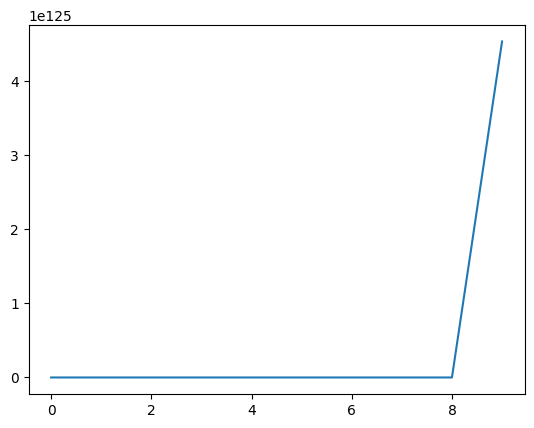

In [226]:
cost_history = []
deta_ = deta
for i in range(10):
    deta_ = descendent(deta_,0.1,x,y)
    print(deta_)
    cost_history.append(cost_function(x,deta_,y))
plt.plot([i for i in range(len(cost_history))],cost_history)

### 4-Afficher les valeurs de $\theta$


In [206]:
deta_

array([[nan],
       [nan]])

### 5-Afficher les résultats de prédictions par rapport a notre Dataset ainsi que la courbe d'apprentissage

In [208]:
iteration=1000
new_deta_value=deta_
for i in range(iteration):
    new_deta_value=descendent(new_deta_value,0.01,x,y)

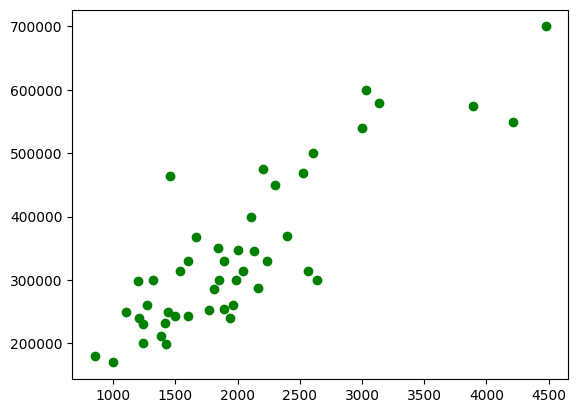

In [211]:
y_predict=lineaire_prediction(x,new_deta_value)
plt.scatter(x[:,0] , y , c='green')
plt.scatter(x[:,0] , y_predict , c='red')

### 6-Utiliser le coefficient de détermination pour évaluer la réelle performance et interpréter le resultats

In [ ]:
def R2(x,y,o):
    return int( 1-( (sum(y-lineaire_prediction(x,o)))/(sum( (y-np.mean(y) )**2) ) ) )
R2(X,y_predict,new_deta_value)